# Coffee Roasting Binary Classification
This notebook creates a synthetic dataset for binary classification and trains a basic neural network using NumPy.

(200, 2) (200, 1)


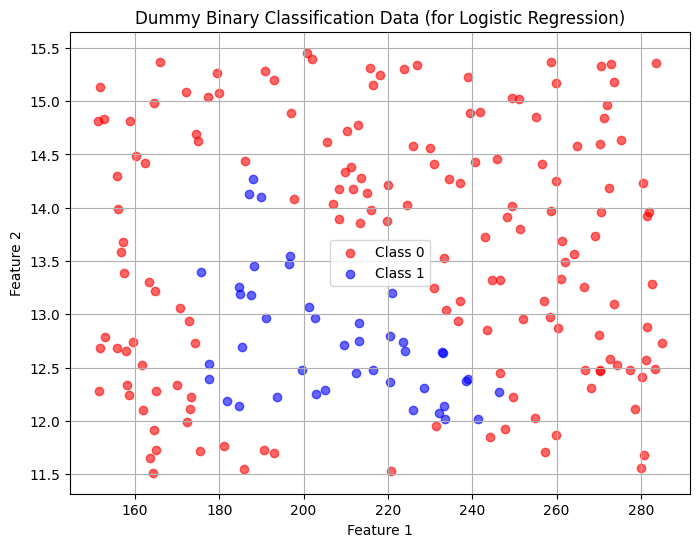

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def load_coffee_data():
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    rng = np.random.default_rng(2)
    X = rng.random(400).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))

X,y = load_coffee_data()
print(X.shape, y.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[y.flatten() == 0][:, 0], X[y.flatten() == 0][:, 1], color="red", label="Class 0", alpha=0.6)
plt.scatter(X[y.flatten() == 1][:, 0], X[y.flatten() == 1][:, 1], color="blue", label="Class 1", alpha=0.6)
plt.title("Dummy Binary Classification Data (for Logistic Regression)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## 1. Generate and Visualize Data
We generate a 2D dataset simulating coffee roasting conditions based on temperature and roasting duration. The goal is to classify good vs bad roasting settings.

In [2]:
np.random.seed(0)

## 2. Set Random Seed
To ensure reproducibility, we fix the random seed.

In [3]:
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X - mean) / std 

## 3. Feature Normalization
Standardize the input features to zero mean and unit variance for efficient training.

In [4]:
def relu(x,grad):
    if grad:
        return (x > 0).astype(float)
    else:
        return np.maximum(0,x)
def sigmoid(x,grad):
    s = 1 / (1 + np.exp(-x))
    if grad:
        return s * (s - 1)
    else:
        return s


## 4. Define Activation Functions
We implement ReLU and Sigmoid activation functions along with their gradients, used during forward and backward passes.

In [5]:
layers = [3,1]
activation = [relu,sigmoid]
W = []
B = []
m = X.shape[0]  
alpha = 0.01
for i in range(len(activation)):
    if i == 0:
        w = np.random.randn(X.shape[1],layers[i])
    else:
        w = np.random.randn(layers[i-1],layers[i])

    b = np.zeros((1,layers[i]))        

    W.append(w)
    B.append(b)

## 5. Initialize Neural Network Parameters
We define a simple neural network with 1 hidden layer using random weights and zero biases.

0.3189952662073589


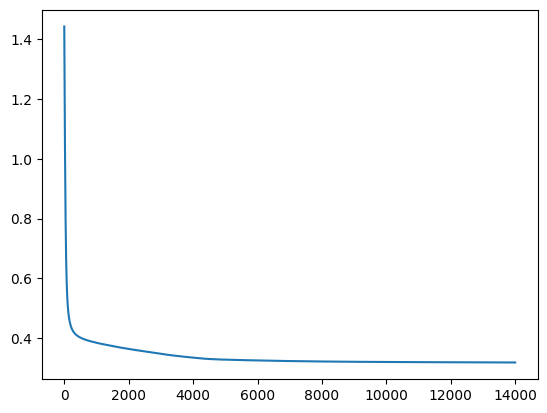

In [6]:
all_cost= []
lmb = 1
for i in range(14000):
    A = X
    all_z = []
    all_a = []
    for i in range(len(W)):
        Z = A @ W[i] + B[i]
        A = activation[i](Z,grad = False)

        all_z.append(Z)
        all_a.append(A)

    cost = ( - 1 / m) * (np.sum( y * np.log(A) + (1 - y) * np.log(1 - A)) + (lmb / 2) * np.sum(W[i] ** 2))
    #cost = (-1 / m) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A)) +(lmb / (2 * m)) * np.sum([W[i]**2])
    all_cost.append(cost)
    for i in range(len(W)-1, -1, -1):
        if i == len(W) - 1:
            dz = (all_a[i] - y)
        else:
            dz = (dz @ W[i+1].T) * activation[i](all_z[i], grad = True)

        if i == 0:
            dw = X.T @ dz
        else:
            dw = all_a[i-1].T @ dz

        W[i] = W[i] - (alpha / m) * (dw + (lmb * W[i]))
        B[i] = B[i] - (alpha / m) * np.sum(dz, keepdims=True, axis=0)

print(cost)
plt.plot(all_cost)
plt.show()